In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Survival_Analysis_in_Python/datasets/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(path_data+'pericardial.csv')
df.head()

,survival,observed,age,pericardialeffusion,name
0,52.0,1.0,62.000,1.0,name
1,24.0,1.0,55.000,1.0,name
2,0.5,0.0,69.000,1.0,name
3,0.5,0.0,62.529,1.0,name
4,1.0,0.0,66.000,1.0,name


In [22]:
none_pericardial_effusion = df[df['pericardialeffusion'] == 0]
has_pericardial_effusion = df[df['pericardialeffusion'] == 1]

display(has_pericardial_effusion.head(1), none_pericardial_effusion.head(1))

,survival,observed,age,pericardialeffusion,name
0,52.0,1.0,62.0,1.0,name


,survival,observed,age,pericardialeffusion,name
24,11.0,1.0,71.0,0.0,name


In [24]:
# exercise 01

"""
Heart disease patient survival

You're a data scientist at a clinical research organization that studies heart diseases. You wonder if pericardial effusion, fluid build-up around the heart, affects heart attack patients' survival outcomes. In this exercise, you will explore how to use two statistical methods to compare survival distributions from patients with and without pericardial effusion.

The data is split up into two DataFrames:

    has_pericardial_effusion: patients with pericardial effusion
    none_pericardial_effusion: patients without pericardial effusion

The pandas package is loaded as pd and the KaplanMeierFitter class is imported from lifelines.
"""

# Instructions

"""
Use .head() to print the first row of the DataFrame has_pericardial_effusion. Pay attention to the column names.
---

    Instantiate KaplanMeierFitter objects called kmf_has_pe for patients with pericardial effusion and kmf_no_pe for patients without pericardial effusion.
    Fit the Kaplan-Meier estimators to patients with and without pericardial effusion.
---

    Print out each group's median survival time.
---
Question

Based on your previous step, which group of patients tends to have a longer survival time?
(none_pericardial_effusion)
"""

# solution

from lifelines import KaplanMeierFitter

# Print first row
print(has_pericardial_effusion.head(1))

#----------------------------------#

# Instantiate Kaplan Meier object for patients with and without pericardial effusion
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

# Fit Kaplan Meier estimators to each DataFrame
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], 
               event_observed=has_pericardial_effusion['observed'])
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], 
              event_observed=none_pericardial_effusion['observed'])

# Print out the median survival duration of each group
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

#----------------------------------#

# Conclusion

"""
Good job! There are many survival distribution properties we can check for by directly calling them after fitting the model. Read more about what's available in the lifelines documentation.
"""

   survival  observed   age  pericardialeffusion  name
0      52.0       1.0  62.0                  1.0  name
The median survival duration (months) of patients with pericardial effusion:  27.0
The median survival duration (months) of patients without pericardial effusion:  31.0


"\nGood job! There are many survival distribution properties we can check for by directly calling them after fitting the model. Read more about what's available in the lifelines documentation.\n"

In [25]:
# exercise 02

"""
Plotting the survival curve

You learned that there are different ways to plot the survival function from the Kaplan-Meier estimator. A survival function on the term lengths of Canadian senators has been fitted for you using KaplanMeierFitter and the instance is called senator_kmf. Try plotting senator_kmf in the console. After each plot, you may run plt.clf() to clear the figure.

Select the correct ways to plot the survival function.

    A. senator_kmf.plot_survival_function()
    B. senator_kmf.plot_survival_distribution()
    C. senator_kmf.survival_function_.plot()
    D. plt.plot(senator_kmf)
    E. senator_kmf.plot()

"""

# Instructions

"""
Answer = (A,C,E)
"""

# solution



#----------------------------------#

# Conclusion

"""
That's right! There are many ways to plot the survival function from the Kaplan-Meier estimator!
"""

"\nThat's right! There are many ways to plot the survival function from the Kaplan-Meier estimator!\n"

In [27]:
recur = pd.read_csv(path_data+'recur.csv')
recur.head()

,age,time_0,time_1,censor
0,43,9,56,1
1,43,56,88,1
2,43,0,6,1
3,43,6,9,1
4,43,0,42,1


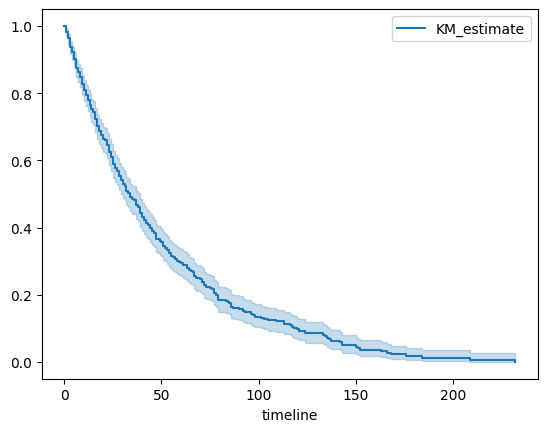

'\nCongratulations! The confidence interval band depends on the size of the sample, and as long as the last observation is not censored, the curve will drop to 0.\n'

In [28]:
# exercise 03

"""
Patient soreness treatment

You are studying a treatment for muscle soreness recurrence in patients. You want to use the Kaplan-Meier estimator to visualize the rate at which patients receiving the treatment encounter soreness episodes.

The DataFrame is called recur and contains columns

    age: the age of the patient;
    time_0: the time that the patient received the treatment;
    time_1: the last time of an event, or the last time you measured a censored patient;
    censor: whether the event is censored;

The pandas package is loaded as pd, the KaplanMeierFitter class is imported from lifelines, and the pyplot module has been import from matplotlib as plt.
"""

# Instructions

"""

    Create a new column for the duration of the observation and call it duration.
---

    Instantiate a KaplanMeierFitter called kmf and fit recur to the class.
---

    Plot the survival function of kmf with its confidence interval.
    Display the figure of the survival function plot.
---
Question

Based on the survival curve you just plotted, select the pair of statements that are both true.

    A. The confidence interval gets wider because there are fewer patients at risk.
    B. The confidence interval gets wider because fewer patients experience soreness.
    C. Soreness is more likely to occur to at-risk patients within the first 50 hours of treatment than after 50 hours.
    D. Because the survival curve ends at 0, all patients have experienced soreness by the end of the study.
(A,C)
"""

# solution

# Calculate duration
recur['duration'] = recur['time_1'] - recur['time_0']

# Instantiate and fit KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(recur['duration'], recur['censor'])

# Plot survival function with CI
kmf.plot_survival_function()

# Display figure
plt.show()

#----------------------------------#

# Conclusion

"""
Congratulations! The confidence interval band depends on the size of the sample, and as long as the last observation is not censored, the curve will drop to 0.
"""

In [59]:
x = pd.read_csv(path_data+'x_data.csv')
y = pd.read_csv(path_data+'y_data.csv')

df = pd.concat([x,y], axis=1)



In [57]:
bc_df = pd.read_csv(path_data+'bc_df.csv')


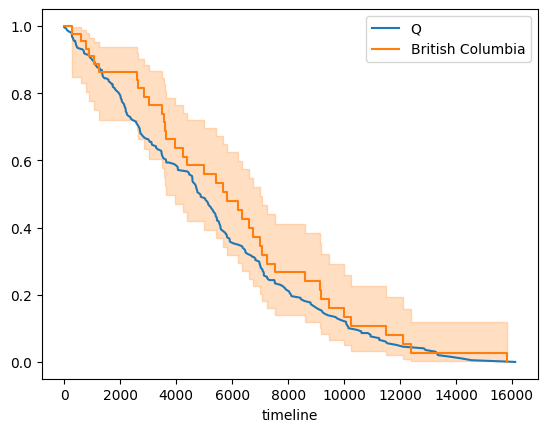

'\nGreat job! Notice that without confidence intervals, there is a big gap between the survival curves. The confidence intervals show that the observed gap might not be due to real differences in their survival functions.\n'

In [62]:
# exercise 04

"""
Senators' terms in office

You want to compare if senators from Quebec tend to serve a different term length than those from British Columbia. One simple method is to plot their Kaplan-Meier survival functions on the same graph.

The DataFrame containing British Columbia senator term durations information is called bc_df. It contains columns

    name: the name the of senator
    diff_days: the duration of the senator in office
    observed: whether the end of the term is observed (1 or 0)

The survival curve of Quebec senators has been plotted on a pyplot object called senator_fig, and a KaplanMeierFitter instance called kmf has been created.

Additionally, the pandas package is loaded as pd, the KaplanMeierFitter class is imported from lifelines, and the pyplot module has been import from matplotlib as plt.
"""

# Instructions

"""

    Fit the KaplanMeierFitter instance kmf to British Columbia senators' term durations.
    Plot the British Columbia senators' survival curve on the same figure as that of Quebec senators.
    Display the figure.

"""

# solution

senator_fig, ax = plt.subplots()

ax.plot(x, y)
ax.legend('Quebec')

# Fit Kaplan-Meier estimator
kmf.fit(bc_df['diff_days'], bc_df['observed'], label='British Columbia')

# Plot survival function on senator_fig
kmf.plot(ax=ax)

# Display the figure
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Notice that without confidence intervals, there is a big gap between the survival curves. The confidence intervals show that the observed gap might not be due to real differences in their survival functions.
"""

In [64]:
recur = pd.read_csv(path_data+'recur_new.csv')

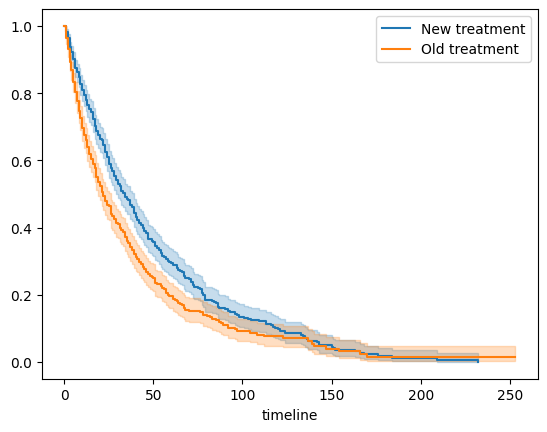

"\nThat's correct! Because the confidence intervals overlap, we need more formal hypothesis testing or regression-based methods to make a conclusion.\n"

In [65]:
# exercise 05

"""
Comparing patient soreness treatments

There is an experiment for a new soreness treatment, and you want to compare patients that received the new treatment versus the old one. You will fit a Kaplan-Meier estimator to each set of patient data and visualize their survival curves side-by-side.

The DataFrame is called recur and contains columns

    age: the age of the patient;
    treat: the treatment that the patient received (0 if new, 1 if old);
    duration: the duration post treatment in hours;
    censor: whether the event is censored;

The pandas package is loaded as pd, the KaplanMeierFitter class is imported from lifelines, and the pyplot module has been import from matplotlib as plt.

Additionally, a KaplanMeierFitter instance called kmf and a subplot figure called ax have been created for you.
"""

# Instructions

"""

    Create a Boolean mask for patients that received the new treatment.
---

    Fit the KaplanMeierFitter instance kmf to patients that received the new treatment. Plot the survival function on the figure ax.
---

    Fit the KaplanMeierFitter instance kmf to patients that received the old treatment. Plot the survival function on the figure ax.
    Display the figure.
---
Question

Are there differences in likelihood to experience soreness 100 hours after treatment among at-risk patients?
(Not enough to tell)
"""

# solution

ax = plt.subplot(111)

# Mask for new treatment
new = (recur['treat'] == 0)

# Fit to new treatment and plot survival function
kmf.fit(recur[new]['duration'], recur[new]['censor'], label='New treatment')
kmf.plot_survival_function(ax=ax)

# Fit to old treatment and plot survival function
kmf.fit(recur[~new]['duration'], recur[~new]['censor'], label='Old treatment')
kmf.plot_survival_function(ax=ax)

# Display figure
plt.show()

#----------------------------------#

# Conclusion

"""
That's correct! Because the confidence intervals overlap, we need more formal hypothesis testing or regression-based methods to make a conclusion.
"""

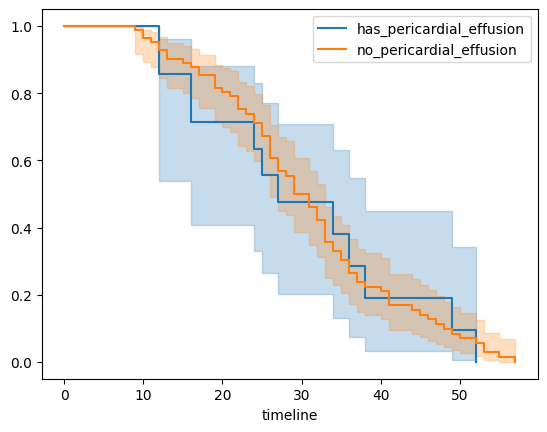

'\nGreat job! Notice that the survival curves look very similar, so you will need to do some formal hypothesis testing to look into this further.\n'

In [66]:
# exercise 06

"""
Plotting and comparing survival curves

Back at the heart clinic, you want to present some visualizations that showcase the differences in patient survival times to the Head of Research. You will plot the survival curves of patients with and without pericardial effusion side-by-side.

A KaplanMeierFitter object kmf is instantiated. DataFrames for patients with and without pericardial effusion are loaded and stored as has_pericardial_effusion and none_pericardial_effusion, respectively.

The KaplanMeierFitter class is imported for you. Additionally, the pandas package is loaded as pd, and the matplotlib.pyplot module is loaded as plt.
"""

# Instructions

"""

    Fit the estimator kmf to patients with pericardial effusion.
    Plot the survival function from kmf and assign the plot object to a new variable surv_plot.
---

    Fit the estimator kmf to patients without pericardial effusion.
    Plot the new survival function on surv_plot and show the plot.

"""

# solution

# Fit kmf to patients with pericardial effusion
kmf.fit(has_pericardial_effusion['survival'], has_pericardial_effusion['observed'], label='has_pericardial_effusion')

# Create a plot of the survival function
surv_plot = kmf.plot()

# Fit kmf to patients without pericardial effusion
kmf.fit(none_pericardial_effusion['survival'], none_pericardial_effusion['observed'], label='no_pericardial_effusion')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! Notice that the survival curves look very similar, so you will need to do some formal hypothesis testing to look into this further.
"""

In [67]:
# exercise 07

"""
Log-rank test

After comparing the median survival times of patients with and without pericardial effusion, you also inspected their survival curves visually. To your surprise, the curves actually seem quite similar to each other. Before you finalize your conclusion, it's important to scientifically test this hypothesis. You will use the log-rank test and inspect the p-value to make a decision.

The pandas package is loaded as pd. DataFrames for patients with and without pericardial effusion are loaded and stored as has_pericardial_effusion and none_pericardial_effusion, respectively.
"""

# Instructions

"""

    Import the logrank_test function from lifelines.statistics.
    Run the log-rank test with the appropriate columns from your data to compare patients with and without pericardial effusion.
---

    Print out the p-value of patient_results.
---
Question

The null hypothesis is that patients with and without pericardial effusion have the same survival curves. Given this null hypothesis and the p-value you just calculated, what can you conclude?
(fail to reject the null hypotesis)
"""

# solution

# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(durations_A = has_pericardial_effusion['survival'], 
                               durations_B = none_pericardial_effusion['survival'], 
                               event_observed_A = has_pericardial_effusion['observed'], 
                               event_observed_B = none_pericardial_effusion['observed'])

# Print out the p-value of log-rank test results
print(patient_results.p_value)

#----------------------------------#

# Conclusion

"""
That's correct! Even though the average survival duration for patients with pericardial effusion is shorter, you cannot reject the null hypothesis that the two groups have the same survival curves based on the data.
"""

0.890495240509155


"\nThat's correct! Even though the average survival duration for patients with pericardial effusion is shorter, you cannot reject the null hypothesis that the two groups have the same survival curves based on the data.\n"